In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
#import matplotlib.pyplot as plt


In [2]:
from collections import defaultdict


def read_dataset(dname):
    
    model=["LDA","SVM","NB","KNN","RF","LR"]
    kind=["PSD","AR","Both"]
    pp=[1,2,3,4,5,10]
    temp_psd= defaultdict(list)
    temp_ar= defaultdict(list)
    temp_both= defaultdict(list)
    temp= {}
    
    ERPCORE_AR_path='../Results/'+dname+'/Experiments/Only_AR_Features/AR_Order.csv'
    ERPCORE_PSD_path='../Results/'+dname+'/Experiments/Only_PSD_Features/PSD_results.csv'
    ERPCORE_AR_PSD_path='../Results/'+dname+'/Experiments/Both_AR_PSD_Features/AR_PSD.csv'

    df_ERPCORE_AR=pd.read_csv(ERPCORE_AR_path, index_col=False)
    df_ERPCORE_AR=df_ERPCORE_AR.drop(columns='Unnamed: 0')
    df_ERPCORE_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

    df_ERPCORE_PSD=pd.read_csv(ERPCORE_PSD_path, index_col=False)
    df_ERPCORE_PSD=df_ERPCORE_PSD.drop(columns='Unnamed: 0')

    df_ERPCORE_AR_PSD=pd.read_csv(ERPCORE_AR_PSD_path, index_col=False)
    df_ERPCORE_AR_PSD=df_ERPCORE_AR_PSD.drop(columns='Unnamed: 0')
    
    
    df_brain_AR=df_ERPCORE_AR[df_ERPCORE_AR['eval Type']=='Open Set']
    df_brain_PSD=df_ERPCORE_PSD[df_ERPCORE_PSD['eval Type']=='Open Set']
    df_brain_AR_PSD=df_ERPCORE_AR_PSD[df_ERPCORE_AR_PSD['eval Type']=='Open Set']
    
    
    grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
    #grouped_df_AR

    grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


    grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)        
    
    
    
    
    for i in model:
        name='AR+'+i
        t =list(grouped_df_AR[grouped_df_AR['pipeline'] == name]['AR_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_ar[j].append(t[j-1])     
    temp["AR"]= temp_ar
    
    for i in model:
        name='PSD+'+i
        t =list(grouped_df_PSD[grouped_df_PSD['pipeline'] == name]['PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_psd[j].append(t[0])     
    temp["PSD"]= temp_psd
    
    for i in model:
        name='AR+PSD+'+i
        t =list(grouped_df_AR_PSD[grouped_df_AR_PSD['pipeline'] == name]['AR_PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_both[j].append(t[j-1])     
    temp["Both"]= temp_both
    
    
    return temp

ERPCORE_P300 PSD 1 [5.61, 2.83, 8.8, 4.17, 1.36, 3.34]
aaa
ERPCORE_N400 PSD 1 [5.15, 3.02, 10.48, 4.92, 0.99, 3.24]
aaa
COG_BCI_Flanker PSD 1 [6.08, 3.68, 10.09, 7.63, 2.8, 4.22]
aaa
Huebner_LLP PSD 1 [3.47, 1.21, 8.11, 3.64, 0.38, 1.84]
aaa
BrainInvaders15a PSD 1 [15.35, 1.48, 10.37, 3.92, 0.49, 7.69]
aaa
Won2022 PSD 1 [6.62, 2.19, 13.31, 4.11, 1.44, 3.53]
aaa
Mantegna2019 PSD 1 [7.6, 5.13, 21.82, 8.23, 3.76, 4.43]
aaa
Sosulski2019 PSD 1 [10.15, 1.62, 10.76, 5.14, 0.34, 11.06]
aaa
Lee2019 PSD 1 [5.58, 2.82, 22.28, 6.92, 2.14, 1.86]
aaa


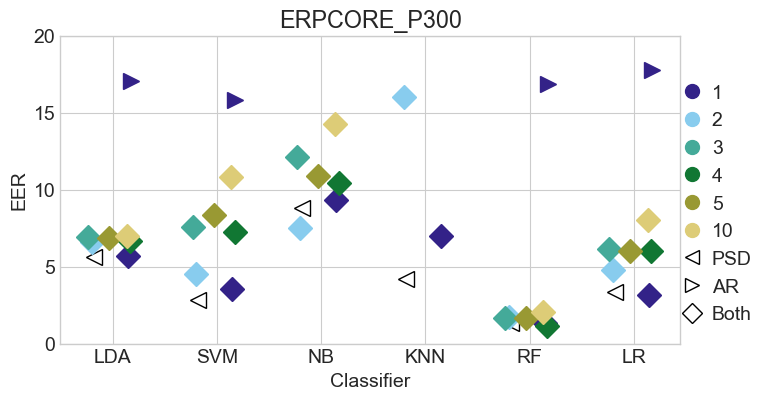

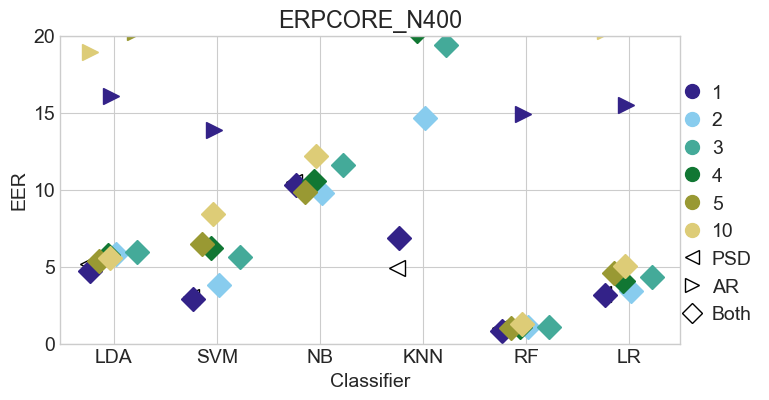

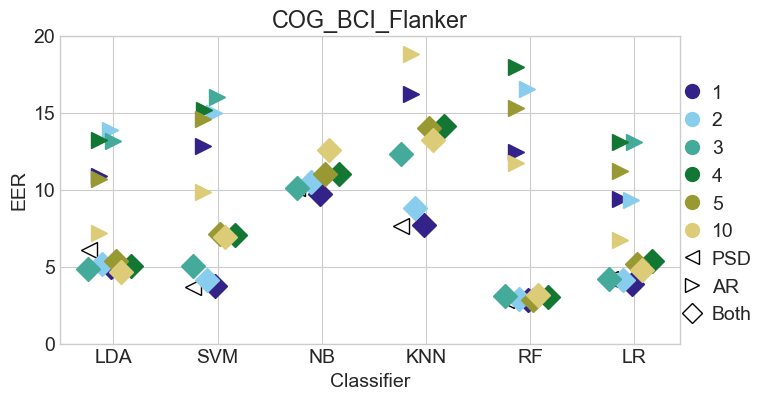

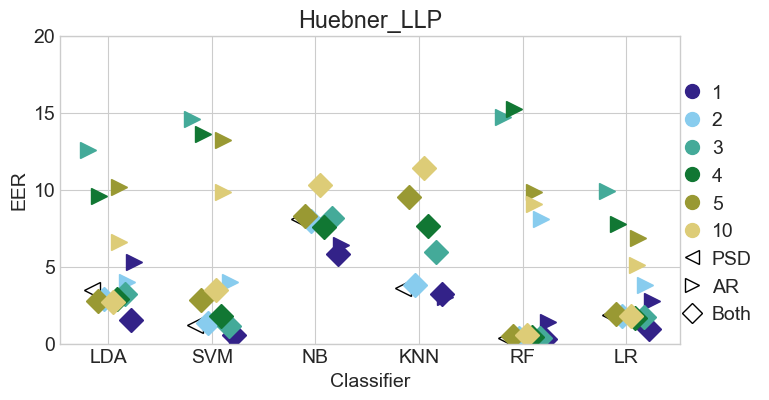

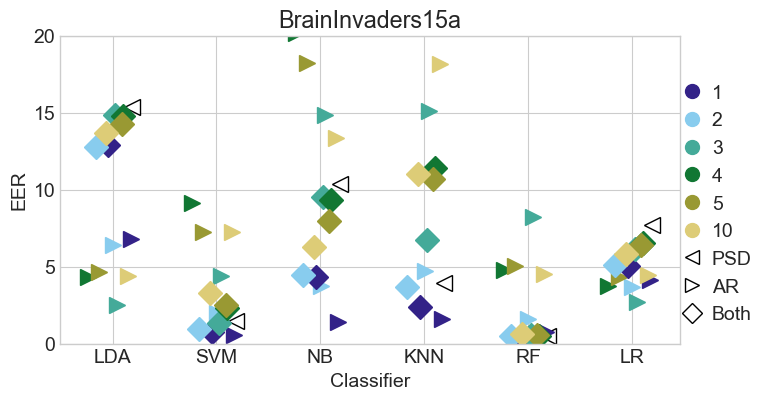

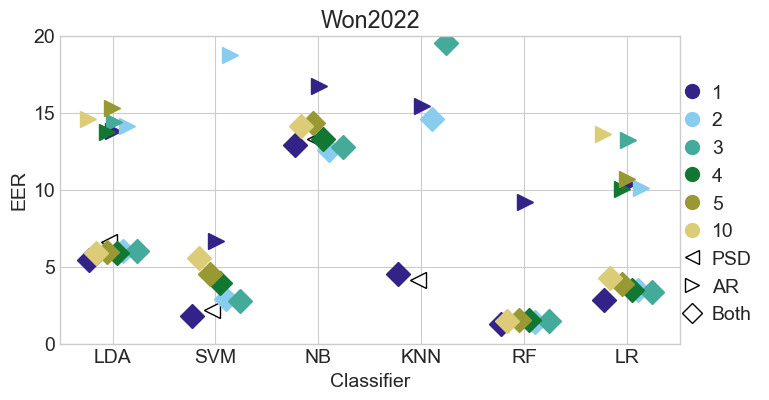

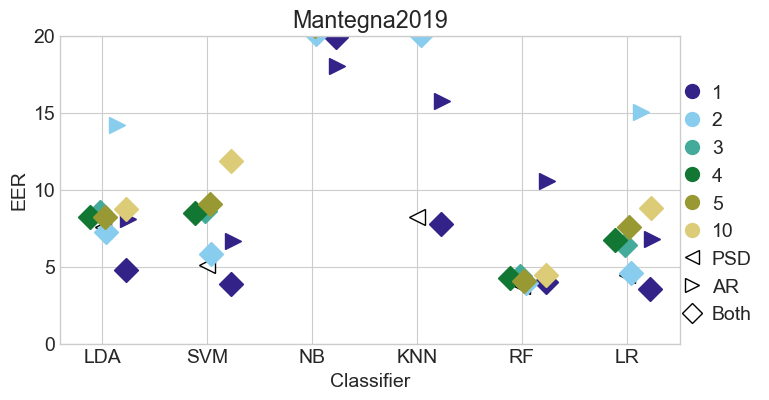

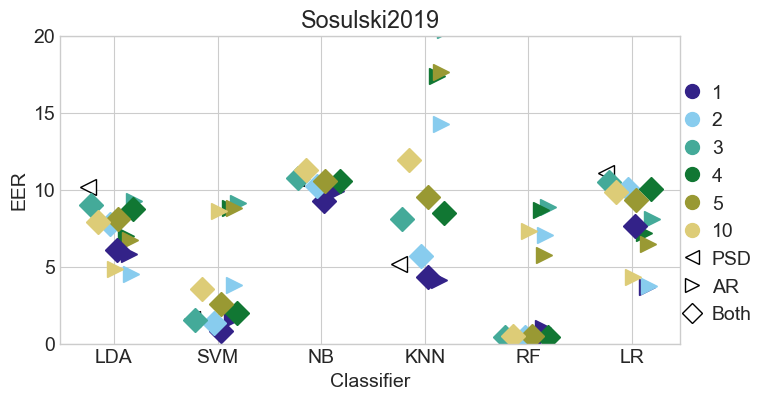

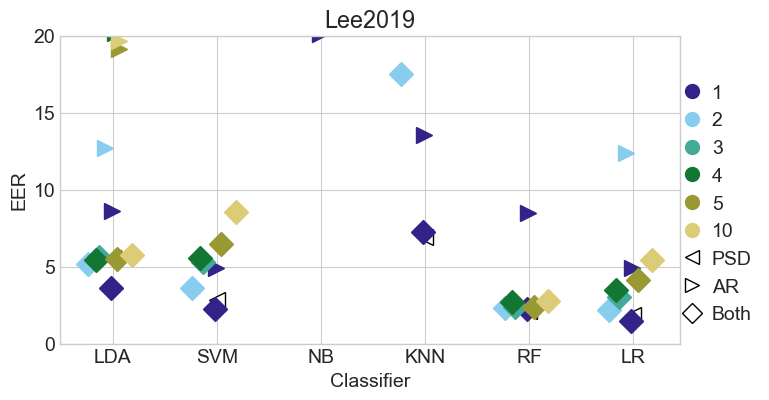

In [3]:
tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]

f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)
    
    


# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 23:36:10 2021

@author: Kid
"""
from matplotlib import pyplot as plt2

import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers


font = {
        'size'   : 14}

plt2.rc('font', **font)

#fn="f3True"
#a_file = open("./"+fn+".pkl", "rb")
#f1dic = pickle.load(a_file)
#model=["LDA","SVM","GNB","KNN","PAC","RC","ABC","RF","LG"]
model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
#tasks=["ERPCORE_N400","COG_BCI_Flanker"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]


ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

for ta in tasks:
	flagpsd=0
	plt2.figure(figsize=(8, 4))
	for kk in kind:
		for jjj in pp:
			#del f1dic[ta][kk][jjj][4]
			#del f1dic[ta][kk][jjj][4]
			#del f1dic[ta][kk][jjj][4]
			if kk=="PSD" and flagpsd==0:
				print(ta,kk,jjj,f1dic[ta][kk][jjj])                
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj),markerfacecolor='white')
				flagpsd=1
			elif kk=="PSD" and flagpsd==1:
				continue
			else:
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj))
	plt2.xticks(x, model)
	legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
						markerfacecolor='#332288', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
						markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#44AA99', label='3',
						markerfacecolor='#44AA99', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#117733', label='4',
						markerfacecolor='#117733', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#999933', label='5',
						markerfacecolor='#999933', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#DDCC77', label='10',
						markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='<', color='black', label='PSD',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='>', color='black', label='AR',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='D', color='black', label='Both',
						markerfacecolor='white', markersize=10,linestyle='None')
						]
	plt2.title(ta)
	plt2.ylim(ymax = 20, ymin = 0)
	plt2.ylabel('EER')
	plt2.xlabel('Classifier')
	plt2.legend(handles=legend_elements, handletextpad=0.0005,bbox_to_anchor=(0.96, 0.9))
	print("aaa")
	#plt2.savefig("./plots/"+ta+".pdf")

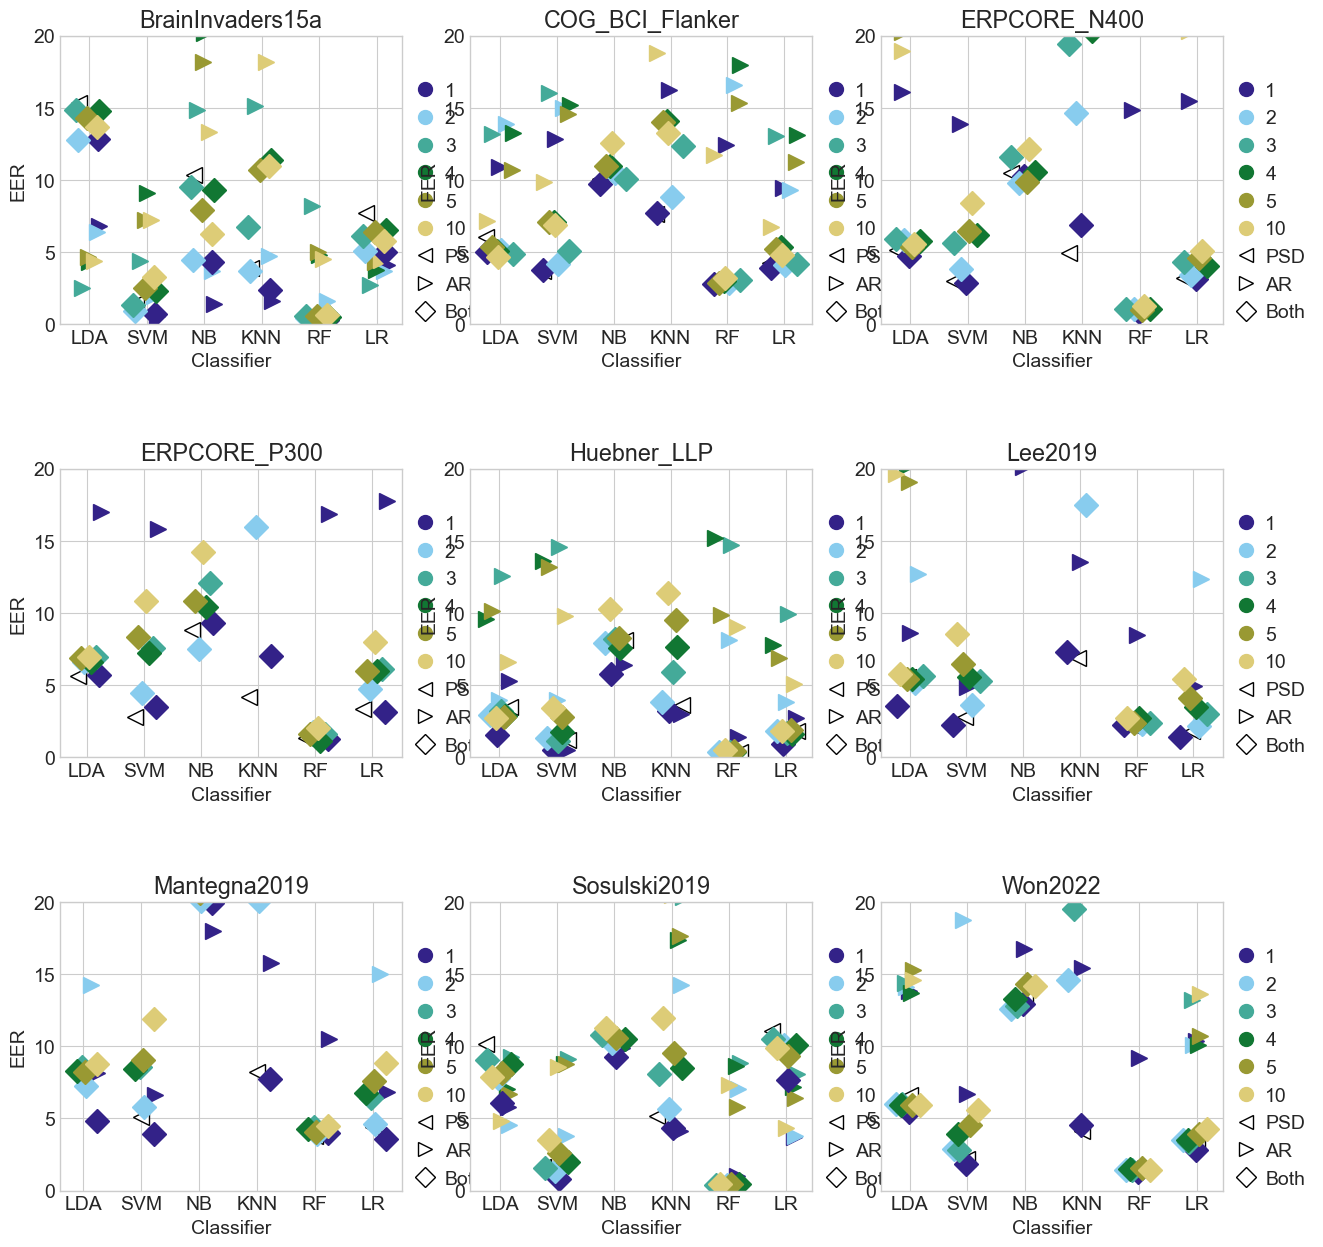

In [4]:
#tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]
tasks=["BrainInvaders15a","COG_BCI_Flanker","ERPCORE_N400","ERPCORE_P300","Huebner_LLP","Lee2019","Mantegna2019","Sosulski2019","Won2022"]


f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots
fig, axs = plt2.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for idx, ta in enumerate(tasks):
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title(ta)
    axs[row, col].set_ylim(ymax=20, ymin=0)
    axs[row, col].set_ylabel('EER')
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].legend(handles=legend_elements, handletextpad=0.0005, bbox_to_anchor=(0.96, 0.9))

# Save the entire figure
#plt2.savefig("./plots/all_plots.pdf")
plt2.show()


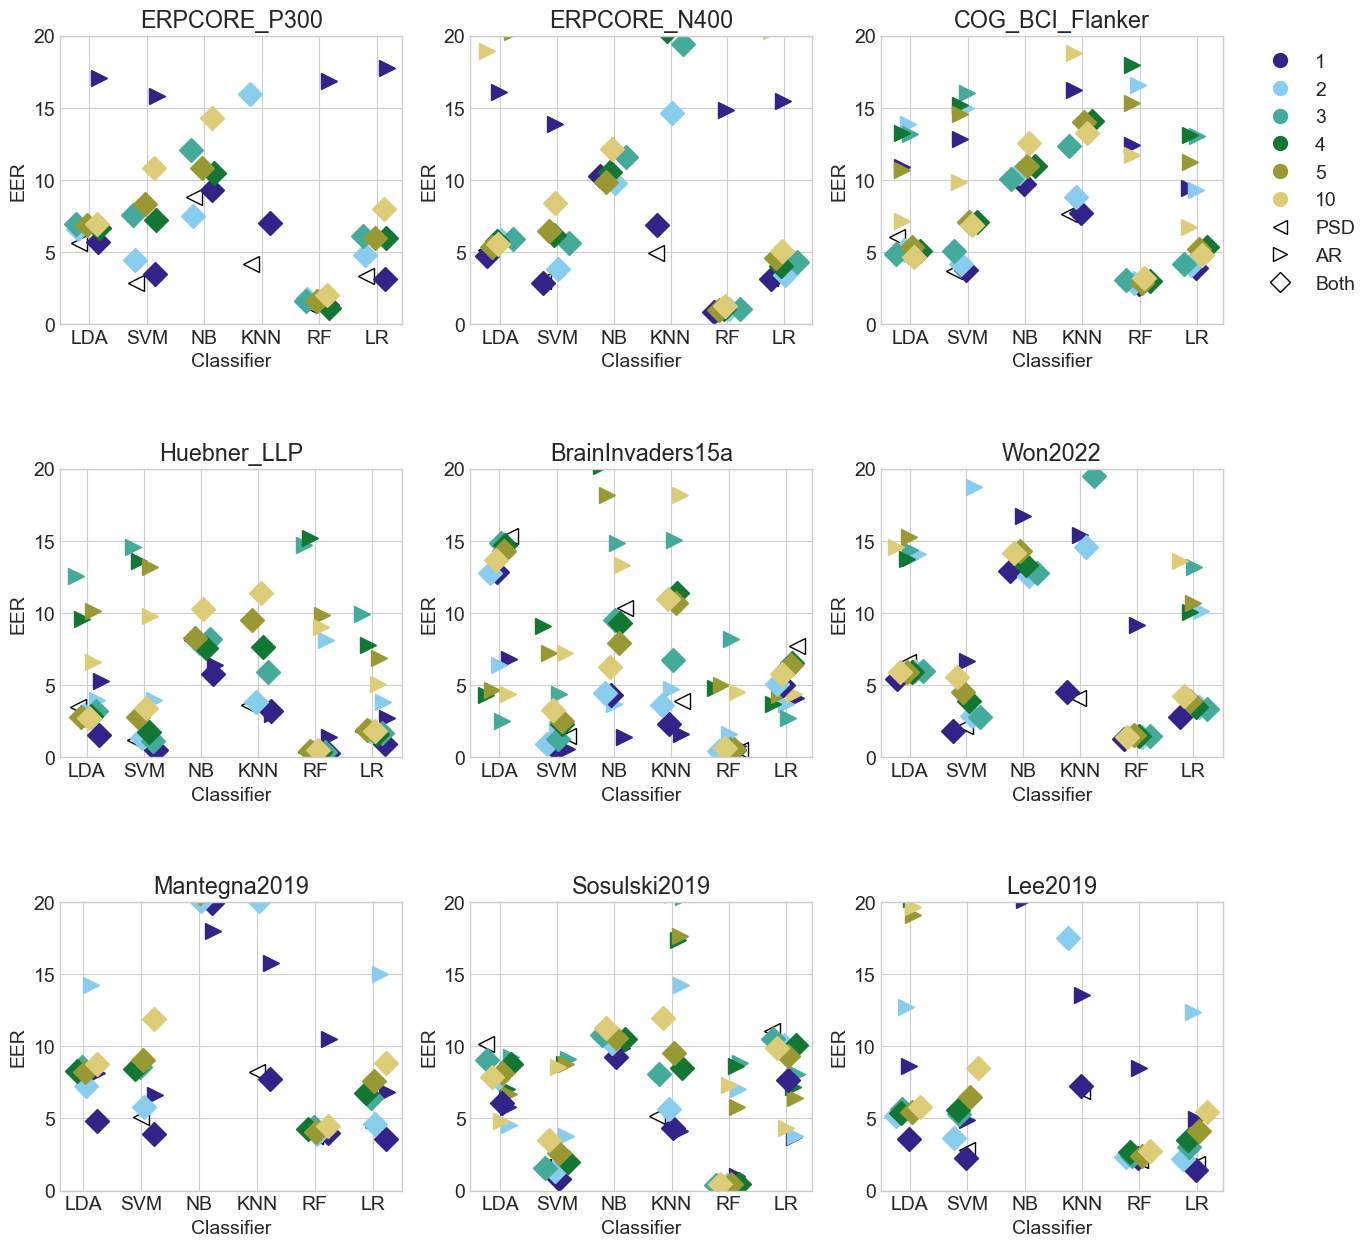

In [5]:
tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]

f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots
fig, axs = plt2.subplots(3, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for idx, ta in enumerate(tasks):
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title(ta)
    axs[row, col].set_ylim(ymax=20, ymin=0)
    axs[row, col].set_ylabel('EER')
    axs[row, col].set_xlabel('Classifier')

# Create a single legend for all subplots
legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
                    markerfacecolor='#332288', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
                    markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#44AA99', label='3',
                    markerfacecolor='#44AA99', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#117733', label='4',
                    markerfacecolor='#117733', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#999933', label='5',
                    markerfacecolor='#999933', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#DDCC77', label='10',
                    markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='<', color='black', label='PSD',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='>', color='black', label='AR',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='D', color='black', label='Both',
                    markerfacecolor='white', markersize=10,linestyle='None')
                    ]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.88))

# Save the entire figure
#plt2.savefig("all_plots_with_legend.pdf")
plt2.show()


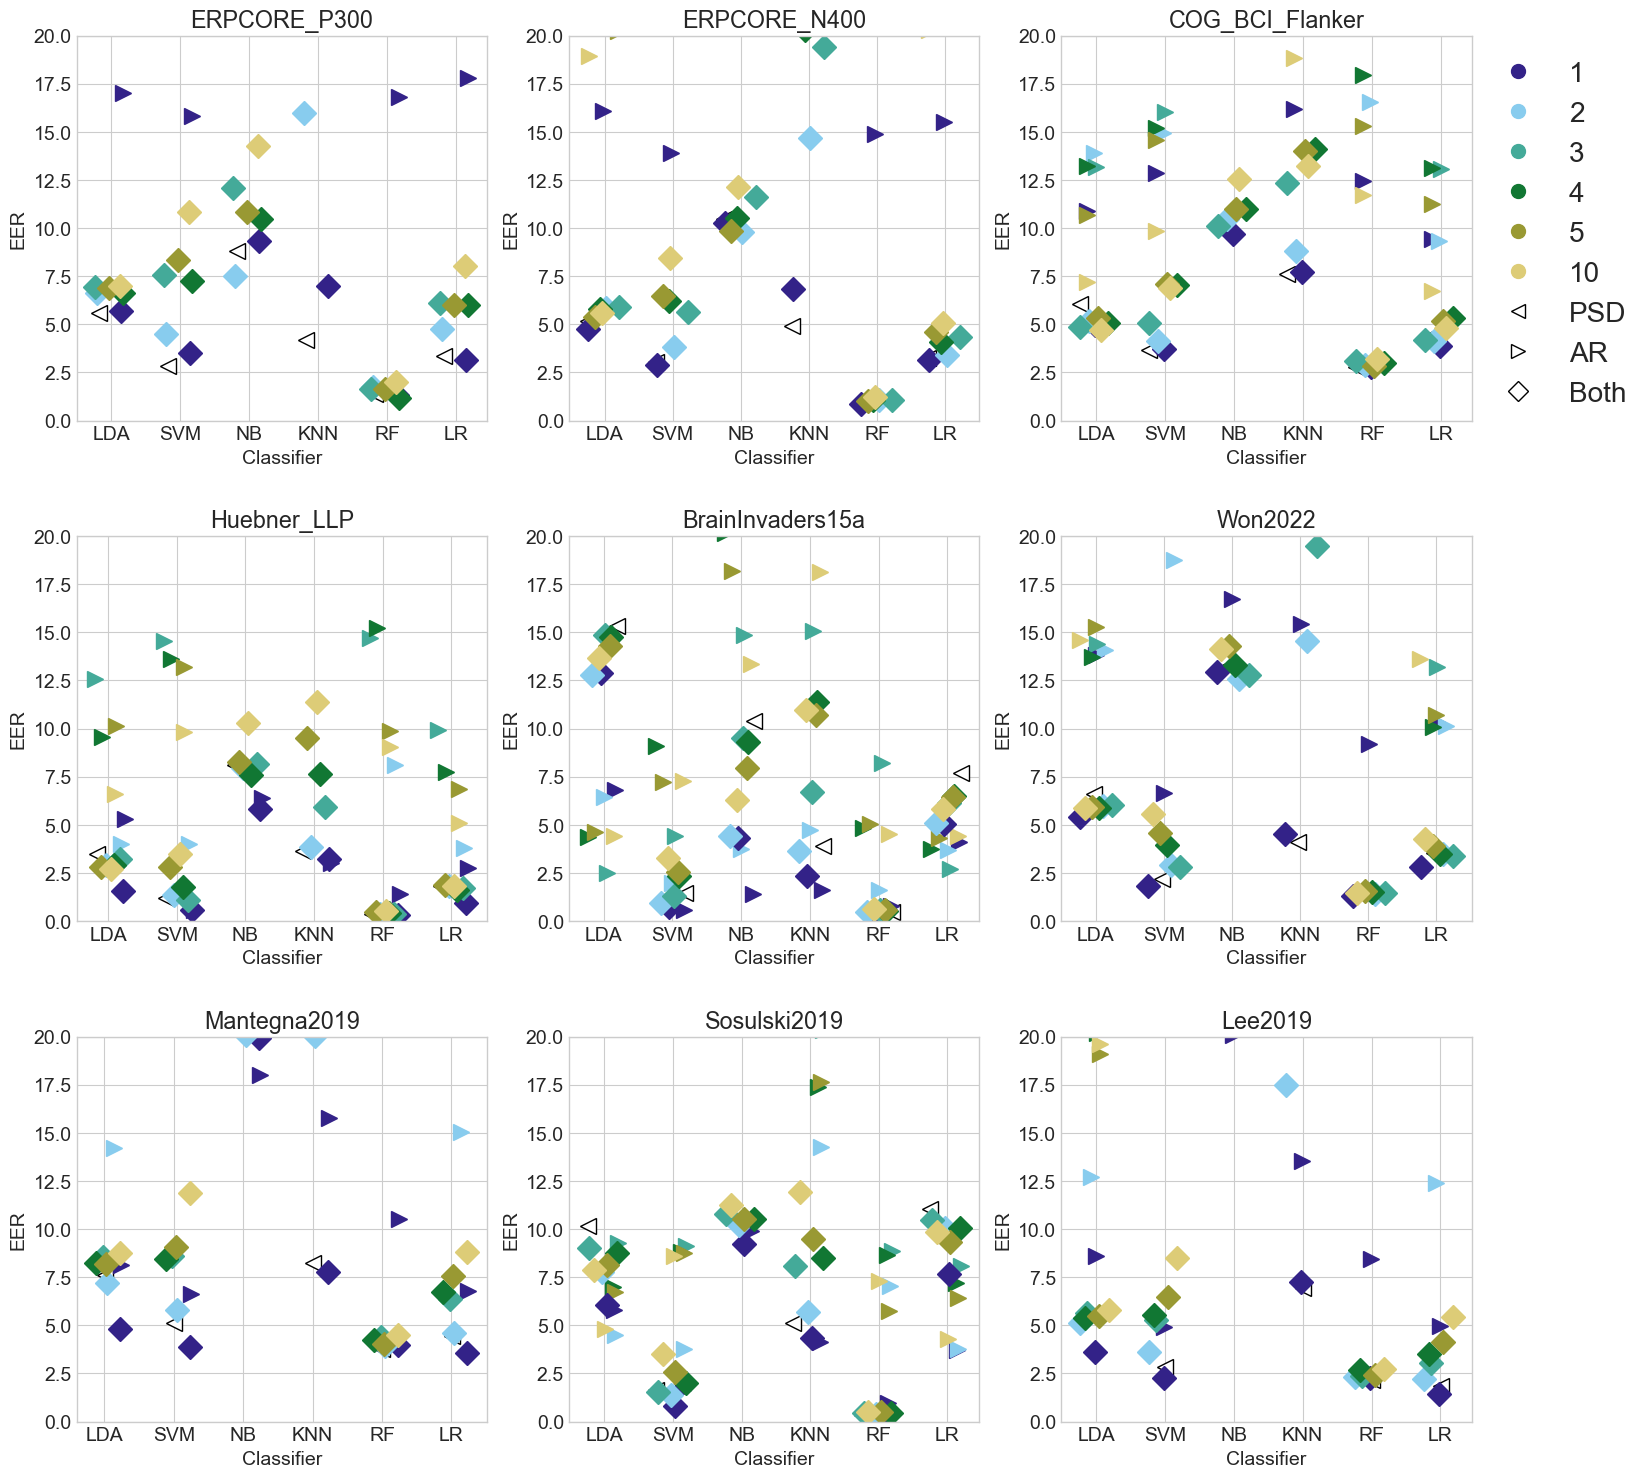

In [6]:
tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]

f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots with increased overall size
fig, axs = plt2.subplots(3, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.3)  # Decrease vertical margin between subplots

for idx, ta in enumerate(tasks):
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title(ta)
    axs[row, col].set_ylim(ymax=20, ymin=0)
    axs[row, col].set_ylabel('EER')
    axs[row, col].set_xlabel('Classifier')

# Create a single legend for all subplots
legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
                    markerfacecolor='#332288', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
                    markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#44AA99', label='3',
                    markerfacecolor='#44AA99', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#117733', label='4',
                    markerfacecolor='#117733', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#999933', label='5',
                    markerfacecolor='#999933', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#DDCC77', label='10',
                    markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='<', color='black', label='PSD',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='>', color='black', label='AR',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='D', color='black', label='Both',
                    markerfacecolor='white', markersize=10,linestyle='None')
                    ]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.0, 0.88), fontsize='x-large')

# Save the entire figure
#plt2.savefig("./plots/all_plots_with_legend.pdf")
plt2.show()


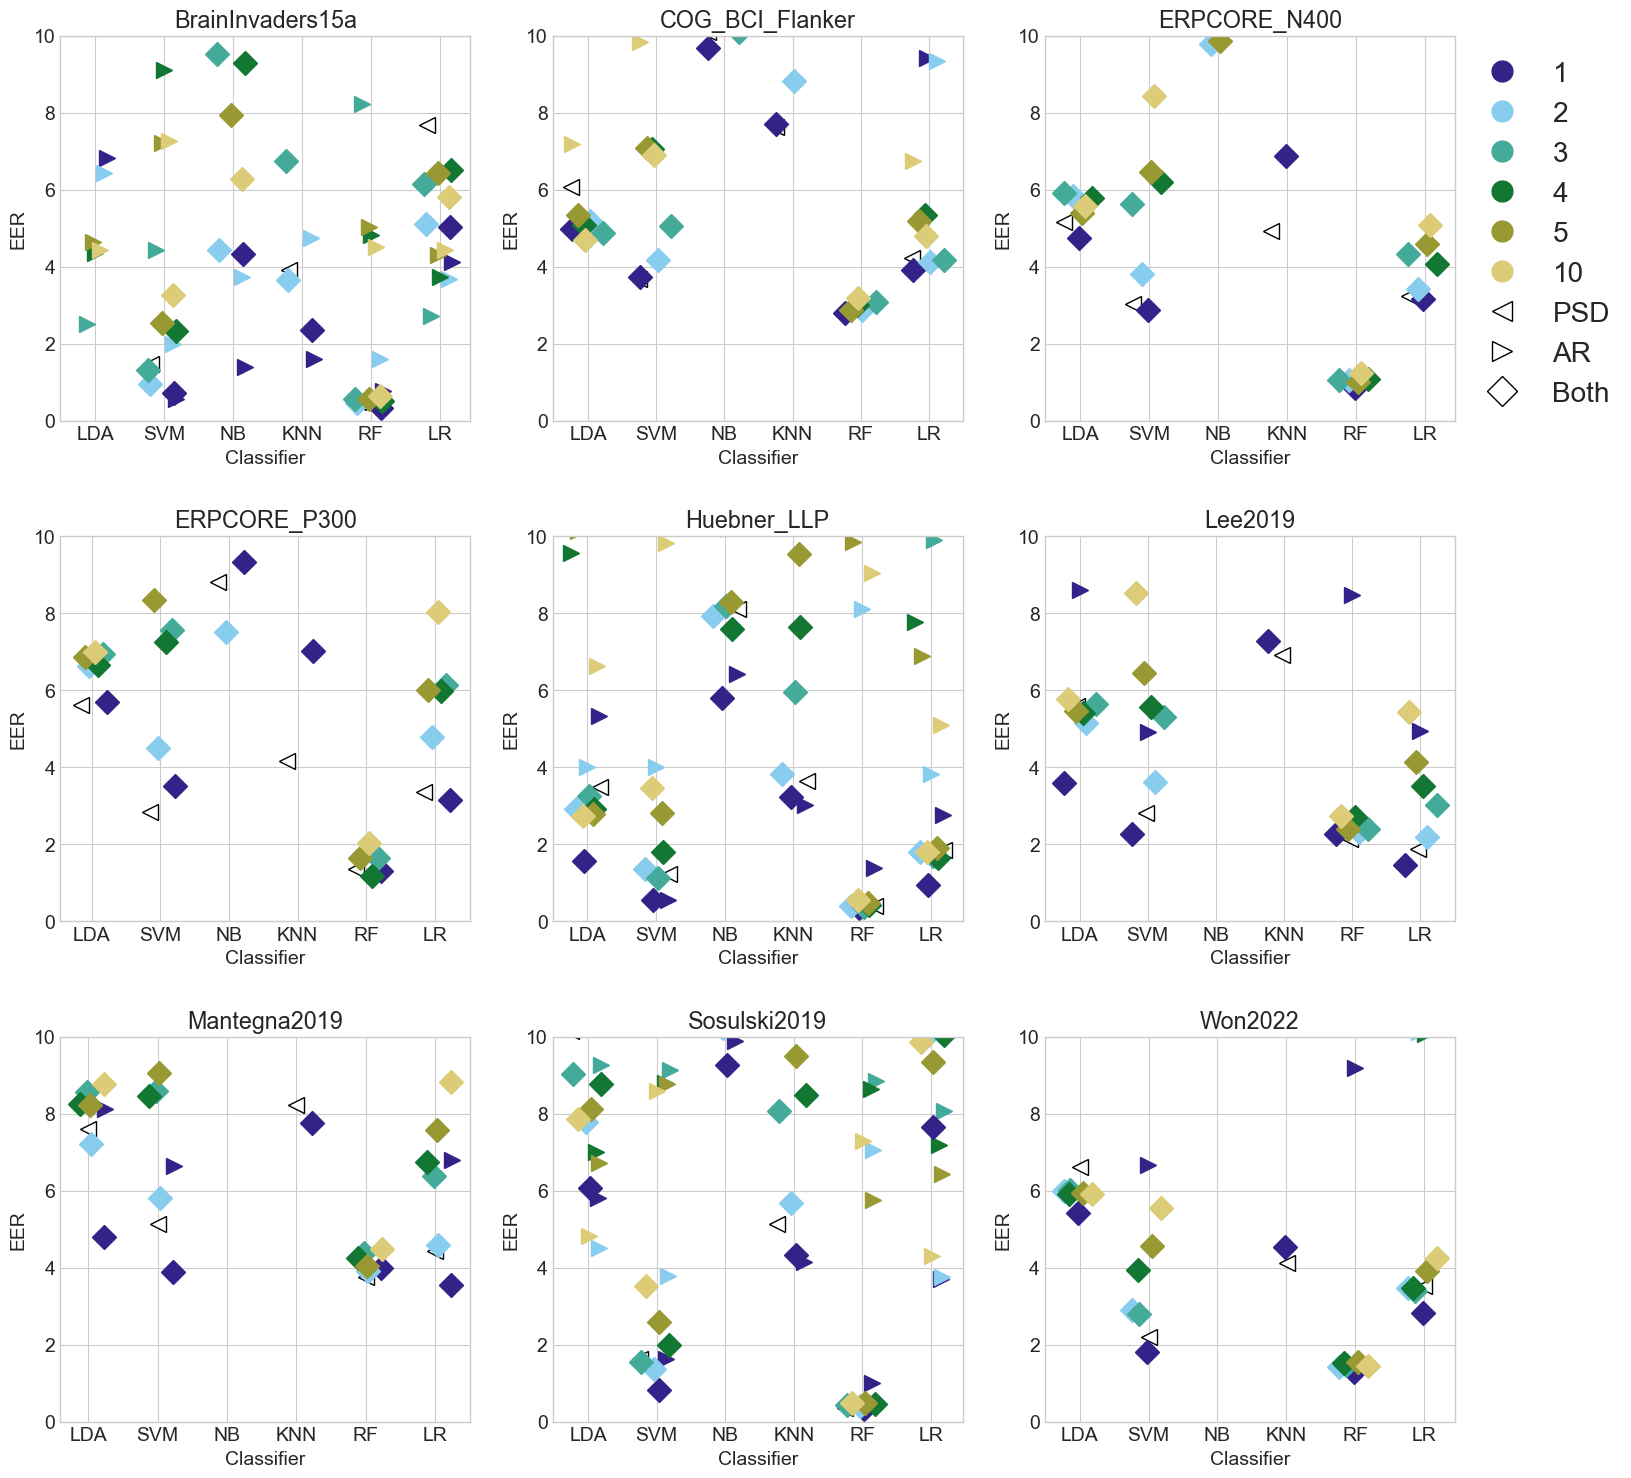

In [7]:
#tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]
tasks=["BrainInvaders15a","COG_BCI_Flanker","ERPCORE_N400","ERPCORE_P300","Huebner_LLP","Lee2019","Mantegna2019","Sosulski2019","Won2022"]


f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots with increased overall size
fig, axs = plt2.subplots(3, 3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.3)  # Decrease vertical margin between subplots

for idx, ta in enumerate(tasks):
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title(ta)
    axs[row, col].set_ylim(ymax=10, ymin=0)
    axs[row, col].set_ylabel('EER')
    axs[row, col].set_xlabel('Classifier')

# Create a single legend for all subplots with larger elements
legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
                    markerfacecolor='#332288', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
                    markerfacecolor='#88CCEE', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#44AA99', label='3',
                    markerfacecolor='#44AA99', markersize=15,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#117733', label='4',
                    markerfacecolor='#117733', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#999933', label='5',
                    markerfacecolor='#999933', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#DDCC77', label='10',
                    markerfacecolor='#DDCC77', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='<', color='black', label='PSD',
                    markerfacecolor='white', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='>', color='black', label='AR',
                    markerfacecolor='white', markersize=15,linestyle='None'),
                    Line2D([0], [0], marker='D', color='black', label='Both',
                    markerfacecolor='white', markersize=15,linestyle='None')
                    ]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.00, 0.88), fontsize='x-large')

# Save the entire figure
plt2.savefig("Feature_Extraction_plot.pdf")
plt2.show()


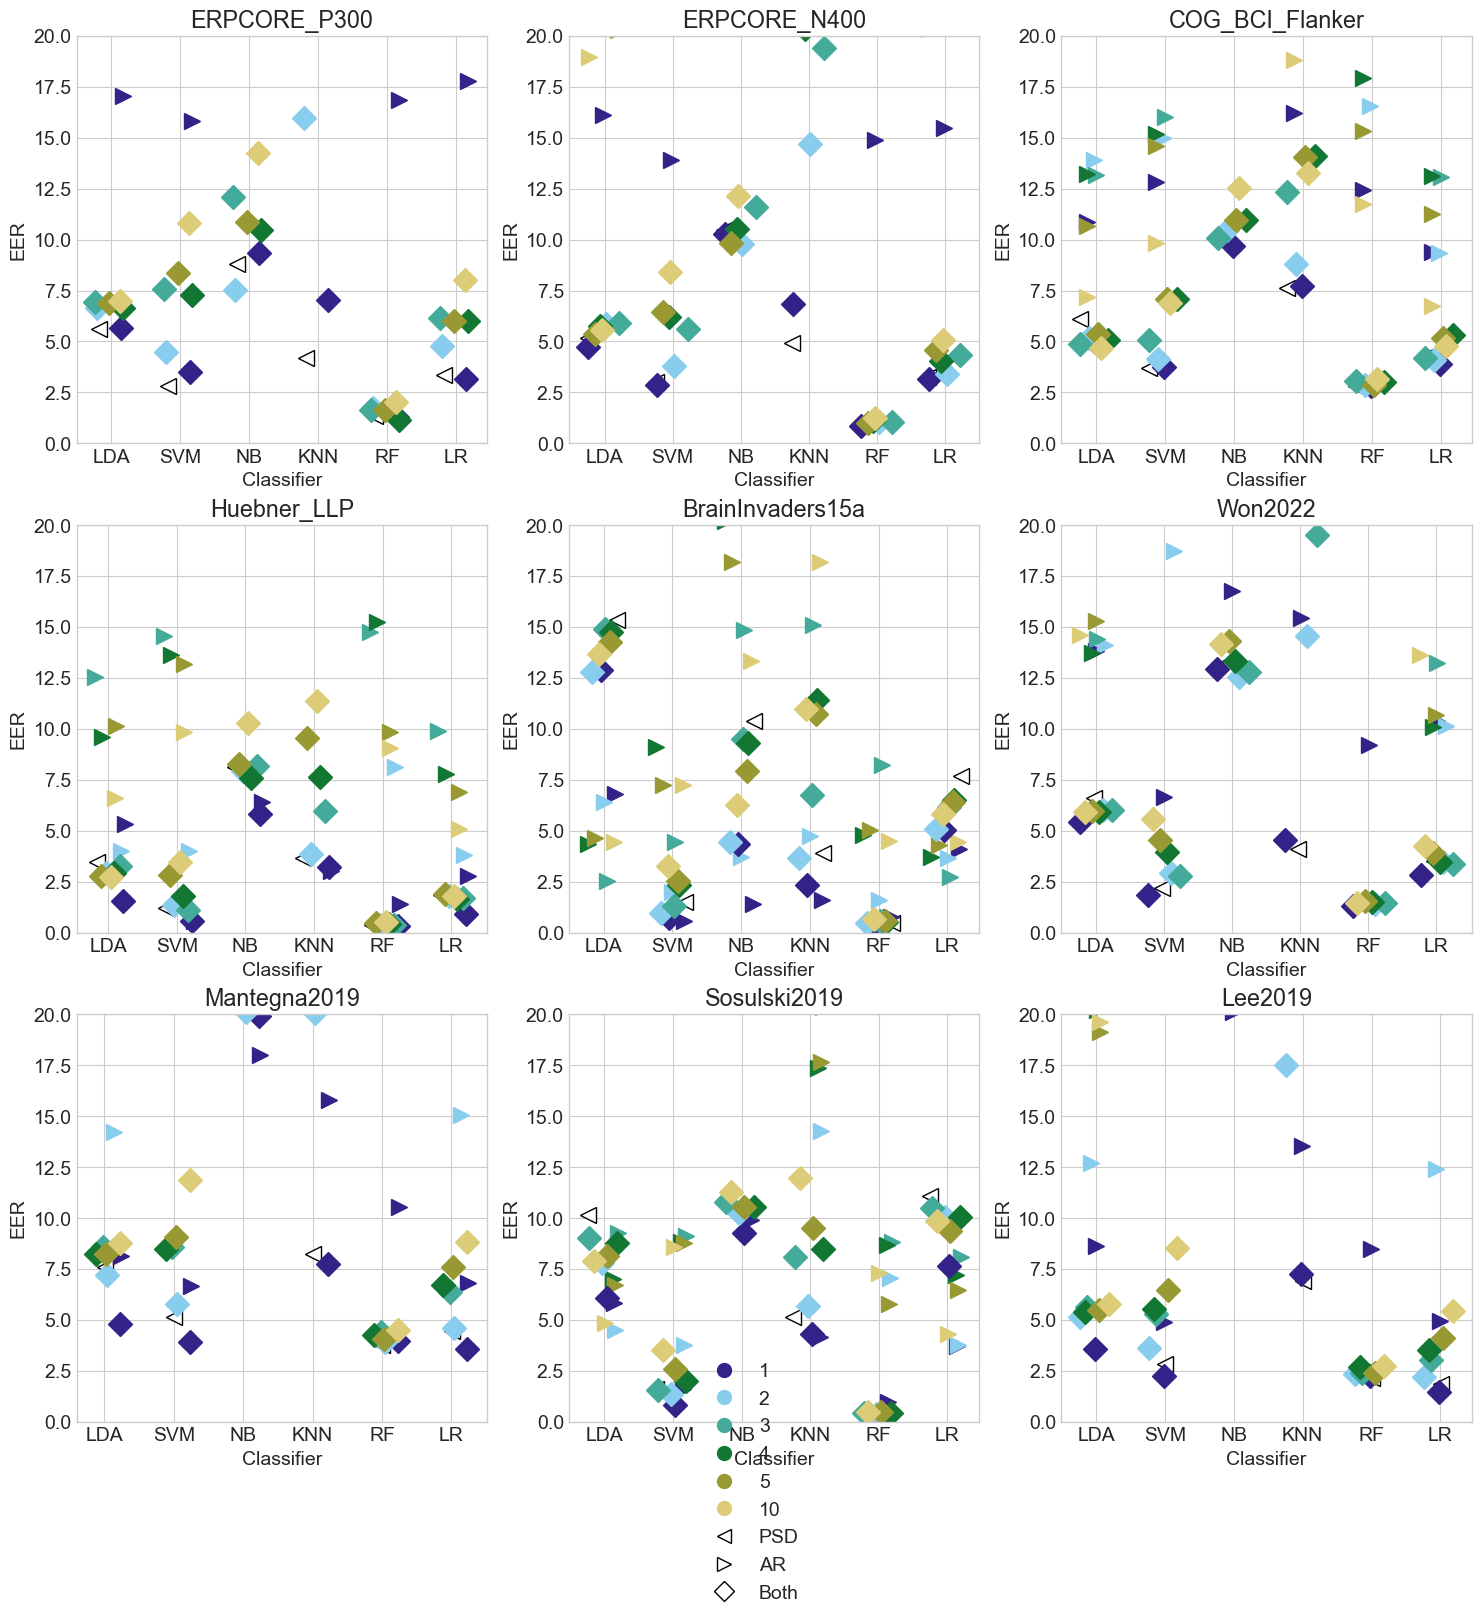

In [8]:
tasks=["ERPCORE_P300","ERPCORE_N400","COG_BCI_Flanker","Huebner_LLP","BrainInvaders15a","Won2022","Mantegna2019","Sosulski2019","Lee2019"]

f1dic={}

for i in tasks:
    f1dic[i]= read_dataset(i)

from matplotlib import pyplot as plt2
import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers

font = {
        'size'   : 14}

plt2.rc('font', **font)

model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]

ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

# Create a 3x3 grid of subplots
fig, axs = plt2.subplots(3, 3, figsize=(18, 18))  # Increase size of each subplot
fig.subplots_adjust(hspace=0.2)  # Decrease vertical margin between subplots

for idx, ta in enumerate(tasks):
    row, col = divmod(idx, 3)
    flagpsd = 0

    for kk in kind:
        for jjj in pp:
            if kk == "PSD" and flagpsd == 0:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj), markerfacecolor='white')
                flagpsd = 1
            elif kk == "PSD" and flagpsd == 1:
                continue
            else:
                axs[row, col].plot(x + ((random() - 0.5) / 2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],
                                   linestyle='None', markersize=12, label=str(kk) + str(jjj))

    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(model)
    axs[row, col].set_title(ta)
    axs[row, col].set_ylim(ymax=20, ymin=0)
    axs[row, col].set_ylabel('EER')
    axs[row, col].set_xlabel('Classifier')

# Create a single legend for all subplots, and place it below the bottom-right subplot
legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
                    markerfacecolor='#332288', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
                    markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#44AA99', label='3',
                    markerfacecolor='#44AA99', markersize=10,linestyle='None'),
                  Line2D([0], [0], marker='o', color='#117733', label='4',
                    markerfacecolor='#117733', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#999933', label='5',
                    markerfacecolor='#999933', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='o', color='#DDCC77', label='10',
                    markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='<', color='black', label='PSD',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='>', color='black', label='AR',
                    markerfacecolor='white', markersize=10,linestyle='None'),
                    Line2D([0], [0], marker='D', color='black', label='Both',
                    markerfacecolor='white', markersize=10,linestyle='None')
                    ]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0))

# Save the entire figure
#plt2.savefig("./plots/all_plots_with_legend.pdf")
plt2.show()


## BrainInvaders15a

In [9]:
BrainInvaders15_AR_path='./Results/COG_BCI_Flanker/Experiments/Only_AR_Features/AR_Order.csv'
BrainInvaders15_PSD_path='./Results/COG_BCI_Flanker/Experiments/Only_PSD_Features/PSD_results.csv'
BrainInvaders15_AR_PSD_path='./Results/COG_BCI_Flanker/Experiments/Both_AR_PSD_Features/AR_PSD.csv'

In [10]:
df_brain_AR=pd.read_csv(BrainInvaders15_AR_path, index_col=False)
df_brain_AR=df_brain_AR.drop(columns='Unnamed: 0')
df_brain_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

df_brain_PSD=pd.read_csv(BrainInvaders15_PSD_path, index_col=False)
df_brain_PSD=df_brain_PSD.drop(columns='Unnamed: 0')

df_brain_AR_PSD=pd.read_csv(BrainInvaders15_AR_PSD_path, index_col=False)
df_brain_AR_PSD=df_brain_AR_PSD.drop(columns='Unnamed: 0')
# df_cogBCI=pd.read_csv(cogBCI_path, index_col=False)
# df_cogBCI=df_cogBCI.drop(columns='Unnamed: 0')


FileNotFoundError: [Errno 2] No such file or directory: './Results/COG_BCI_Flanker/Experiments/Only_AR_Features/AR_Order.csv'

### Selecting Open-set only

In [ ]:
df_brain_AR=df_brain_AR[df_brain_AR['eval Type']=='Open Set']
df_brain_PSD=df_brain_PSD[df_brain_PSD['eval Type']=='Open Set']
df_brain_AR_PSD=df_brain_AR_PSD[df_brain_AR_PSD['eval Type']=='Open Set']

In [ ]:
df_brain_AR_PSD

### Doing Avergaing for close-set scenario

In [ ]:
grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
#grouped_df_AR

grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)

In [ ]:
df_final

In [ ]:
df_final=pd.concat([grouped_df_AR,grouped_df_AR_PSD ], axis=1)
df_final = df_final.loc[:, ~df_final.columns.duplicated()]
df_final['AR_eer']=df_final['AR_eer'].astype(float)
df_final['AR_PSD_eer']=df_final['AR_PSD_eer'].astype(float)

In [ ]:
df_final

In [ ]:
grouped_df_PSD['PSD_eer']=grouped_df_PSD['PSD_eer'].astype(float)

In [ ]:
grouped_df_PSD

### Horizontal Bar plot for PSD performace on BrainInvaders15a

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x='PSD_eer', y='pipeline', data=grouped_df_PSD)

# Set labels and title
plt.xlabel('EER')
plt.ylabel('Algorithm')
#plt.title('EER for Different Pipelines Across AR Orders')

# Show legend
#plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlim(0, 10)
# plt.xticks(range(0, 11, 1))

#plt.ylim(0,15)
#plt.yticks(range(0, 15, 3))
plt.grid(True, ls="--", lw=0.8)

# Show the plot

#plt.savefig('/pc2/users/a/avinashk/Thesis_feature_Plots/Feature_Extratcion/COGBCI/cog_PSD.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Line plot for AR+PSD on BrainInvaders15a

In [ ]:
# Create a line plot
#df_final_sorted = df_final.sort_values(by='AR_PSD_eer')
#display(df_final)
plt.figure(figsize=(7, 5))
sns.lineplot(x='AR_PSD_order', y='AR_PSD_eer', hue='pipeline', data=df_final, marker='o', markersize=8)

# Set labels and title
plt.xlabel('AR Order+PSD')
plt.ylabel('EER')
#plt.title('EER for Different Pipelines Across AR Orders')

# Show legend
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 10)
plt.xticks(range(0, 11, 1))
# plt.ylim(0,35)
# plt.yticks(range(0, 11, 1))
plt.grid(True, ls="--", lw=0.8)
# Show the plot
#plt.savefig('/pc2/users/a/avinashk/Thesis_feature_Plots/Feature_Extratcion/Mantegna/Mantegna_AR_PSD.pdf', format='pdf', bbox_inches='tight')
plt.show()

### Line plot for different AR Orders

In [ ]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='AR_order', y='AR_eer', hue='pipeline', data=df_final, marker='o', markersize=8)

# Set labels and title
plt.xlabel('AR Order')
plt.ylabel('EER')
#plt.title('EER for Different Pipelines Across AR Orders')

# Show legend
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 10)
plt.xticks(range(0, 11, 1))
plt.grid(True, ls="--", lw=0.8)
#plt.savefig('/pc2/users/a/avinashk/Thesis_feature_Plots/Feature_Extratcion/Mantegna/Mantegna_AR.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()

## ERPCORE: N400

In [ ]:
ERPCORE_AR_path='./Results/ERPCORE_N400/Experiments/Only_AR_Features/AR_Order.csv'
ERPCORE_PSD_path='./Results/ERPCORE_N400/Experiments/Only_PSD_Features/PSD_results.csv'
ERPCORE_AR_PSD_path='./Results/ERPCORE_N400/Experiments/Both_AR_PSD_Features/AR_PSD.csv'

In [ ]:
ls "./Results/ERPCORE_N400/Experiments/Only_PSD_Features/"

In [ ]:
df_ERPCORE_AR=pd.read_csv(ERPCORE_AR_path, index_col=False)
df_ERPCORE_AR=df_ERPCORE_AR.drop(columns='Unnamed: 0')
df_ERPCORE_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

df_ERPCORE_PSD=pd.read_csv(ERPCORE_PSD_path, index_col=False)
df_ERPCORE_PSD=df_ERPCORE_PSD.drop(columns='Unnamed: 0')

df_ERPCORE_AR_PSD=pd.read_csv(ERPCORE_AR_PSD_path, index_col=False)
df_ERPCORE_AR_PSD=df_ERPCORE_AR_PSD.drop(columns='Unnamed: 0')

### Selecting Open-set only

In [ ]:
df_brain_AR=df_brain_AR[df_brain_AR['eval Type']=='Open Set']
df_brain_PSD=df_brain_PSD[df_brain_PSD['eval Type']=='Open Set']
df_brain_AR_PSD=df_brain_AR_PSD[df_brain_AR_PSD['eval Type']=='Open Set']

In [ ]:
grouped_df_PSD

In [ ]:
grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
#grouped_df_AR

grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)

## COG-BCI Flanker

In [ ]:
COGBCI_AR_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/COG-BCI/Features_Results/AR/AR_results.csv'
COGBCI_PSD_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/COG-BCI/Features_Results/PSD/PSD_results.csv'
COGBCI_AR_PSD_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/COG-BCI/Features_Results/AR_PSD/AR_PSD_results.csv'

In [ ]:
df_COGBCI_AR=pd.read_csv(COGBCI_AR_path, index_col=False)
df_COGBCI_AR=df_COGBCI_AR.drop(columns='Unnamed: 0')
df_COGBCI_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

df_COGBCI_PSD=pd.read_csv(COGBCI_PSD_path, index_col=False)
df_COGBCI_PSD=df_COGBCI_PSD.drop(columns='Unnamed: 0')

df_COGBCI_AR_PSD=pd.read_csv(COGBCI_AR_PSD_path, index_col=False)
df_COGBCI_AR_PSD=df_COGBCI_AR_PSD.drop(columns='Unnamed: 0')

In [ ]:
grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
#grouped_df_AR

grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                'eer': lambda x: f'{np.mean(x)*100:.2f}',
                #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()
grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)

In [ ]:
list(grouped_df_AR[grouped_df_AR['pipeline'] == 'AR+LDA']['AR_eer'].astype(float))

In [ ]:
from collections import defaultdict


def read_dataset(dname):
    
    model=["LDA","SVM","NB","KNN","RF","LR"]
    kind=["PSD","AR","Both"]
    pp=[1,2,3,4,5,10]
    temp_psd= defaultdict(list)
    temp_ar= defaultdict(list)
    temp_both= defaultdict(list)
    temp= {}
    
    ERPCORE_AR_path='./Results/'+dname+'/Experiments/Only_AR_Features/AR_Order.csv'
    ERPCORE_PSD_path='./Results/'+dname+'/Experiments/Only_PSD_Features/PSD_results.csv'
    ERPCORE_AR_PSD_path='./Results/'+dname+'/Experiments/Both_AR_PSD_Features/AR_PSD.csv'

    df_ERPCORE_AR=pd.read_csv(ERPCORE_AR_path, index_col=False)
    df_ERPCORE_AR=df_ERPCORE_AR.drop(columns='Unnamed: 0')
    df_ERPCORE_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

    df_ERPCORE_PSD=pd.read_csv(ERPCORE_PSD_path, index_col=False)
    df_ERPCORE_PSD=df_ERPCORE_PSD.drop(columns='Unnamed: 0')

    df_ERPCORE_AR_PSD=pd.read_csv(ERPCORE_AR_PSD_path, index_col=False)
    df_ERPCORE_AR_PSD=df_ERPCORE_AR_PSD.drop(columns='Unnamed: 0')
    
    
    df_brain_AR=df_ERPCORE_AR[df_ERPCORE_AR['eval Type']=='Open Set']
    df_brain_PSD=df_ERPCORE_PSD[df_ERPCORE_PSD['eval Type']=='Open Set']
    df_brain_AR_PSD=df_ERPCORE_AR_PSD[df_ERPCORE_AR_PSD['eval Type']=='Open Set']
    
    
    grouped_df_AR=df_brain_AR.groupby(['pipeline', 'AR_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR.rename(columns={'eer':'AR_eer'}, inplace=True)
    #grouped_df_AR

    grouped_df_PSD=df_brain_PSD.groupby(['pipeline', 'PSD']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_PSD.rename(columns={'eer':'PSD_eer'}, inplace=True)


    grouped_df_AR_PSD=df_brain_AR_PSD.groupby(['pipeline', 'AR_PSD_order']).agg({
                    'eer': lambda x: f'{np.mean(x)*100:.2f}',
                    #'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}'
                }).reset_index()
    grouped_df_AR_PSD.rename(columns={'eer':'AR_PSD_eer'}, inplace=True)        
    
    
    
    
    for i in model:
        name='AR+'+i
        t =list(grouped_df_AR[grouped_df_AR['pipeline'] == name]['AR_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_ar[j].append(t[j-1])     
    temp["AR"]= temp_ar
    
    for i in model:
        name='PSD+'+i
        t =list(grouped_df_PSD[grouped_df_PSD['pipeline'] == name]['PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_psd[j].append(t[0])     
    temp["PSD"]= temp_psd
    
    for i in model:
        name='AR+PSD+'+i
        t =list(grouped_df_AR_PSD[grouped_df_AR_PSD['pipeline'] == name]['AR_PSD_eer'].astype(float))
        for j in pp:
            #print(name,j, len(t))
            temp_both[j].append(t[j-1])     
    temp["Both"]= temp_both
    
    
    return temp

In [ ]:
list(grouped_df_PSD[grouped_df_PSD['pipeline'] == 'PSD+KNN']['PSD_eer'].astype(float))

In [ ]:
a=read_dataset('ERPCORE_N400')

In [ ]:
print(a)

In [ ]:
tasks=["ERPCORE_N400"]

for i in tasks:
    

In [ ]:
f1dic["ERPCORE_N400"]['PSD']

In [ ]:
tasks=["ERPCORE_N400"]

for i in tasks:


# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 23:36:10 2021

@author: Kid
"""
from matplotlib import pyplot as plt2

import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers


font = {
        'size'   : 14}

plt2.rc('font', **font)

#fn="f3True"
#a_file = open("./"+fn+".pkl", "rb")
#f1dic = pickle.load(a_file)
#model=["LDA","SVM","GNB","KNN","PAC","RC","ABC","RF","LG"]
model=["LDA","SVM","NB","KNN","RF","LR"]
kind=["PSD","AR","Both"]
tasks=["ERPCORE_N400","COG_BCI_Flanker"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]


ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

for ta in tasks:
	flagpsd=0
	plt2.figure(figsize=(8, 4))
	for kk in kind:
		for jjj in pp:
			#del f1dic[ta][kk][jjj][4]
			#del f1dic[ta][kk][jjj][4]
			#del f1dic[ta][kk][jjj][4]
			if kk=="PSD" and flagpsd==0:
				print(ta,kk,jjj,f1dic[ta][kk][jjj])                
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj),markerfacecolor='white')
				flagpsd=1
			elif kk=="PSD" and flagpsd==1:
				continue
			else:
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj))
	plt2.xticks(x, model)
	legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
						markerfacecolor='#332288', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
						markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#44AA99', label='3',
						markerfacecolor='#44AA99', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#117733', label='4',
						markerfacecolor='#117733', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#999933', label='5',
						markerfacecolor='#999933', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#DDCC77', label='10',
						markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='<', color='black', label='PSD',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='>', color='black', label='AR',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='D', color='black', label='Both',
						markerfacecolor='white', markersize=10,linestyle='None')
						]
	plt2.title(ta)
	plt2.ylim(ymax = 20, ymin = 0)
	plt2.ylabel('EER')
	plt2.xlabel('Classifier')
	plt2.legend(handles=legend_elements, handletextpad=0.0005,bbox_to_anchor=(0.96, 0.9))
	print("aaa")
	#plt2.savefig("./results2/"+ta+fn+".pdf")

## Mantegna2019

In [ ]:
MANTEGNA_AR_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/Mantegena2019/Features_Results/AR/AR_results.csv'
MANTEGNA_PSD_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/Mantegena2019/Features_Results/PSD/PSD_results.csv'
MANTEGNA_AR_PSD_path='/scratch/hpc-prf-bbam/avinashk/deeb/examples/Mantegena2019/Features_Results/AR_PSD/AR_PSD_results.csv'

In [ ]:
df_MANTEGNA_AR=pd.read_csv(MANTEGNA_AR_path, index_col=False)
df_MANTEGNA_AR=df_MANTEGNA_AR.drop(columns='Unnamed: 0')
df_MANTEGNA_AR.rename(columns={'AR_PSD': 'AR'}, inplace=True)

df_MANTEGNA_PSD=pd.read_csv(MANTEGNA_PSD_path, index_col=False)
df_MANTEGNA_PSD=df_MANTEGNA_PSD.drop(columns='Unnamed: 0')

df_MANTEGNA_AR_PSD=pd.read_csv(MANTEGNA_AR_PSD_path, index_col=False)
df_MANTEGNA_AR_PSD=df_MANTEGNA_AR_PSD.drop(columns='Unnamed: 0')

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
colors = plt.cm.viridis_r(df_final['AR'] / df_final['AR'].max())  # Color map based on order

# Plot AR EERs
for i, row in df_final.iterrows():
    plt.scatter(row['pipeline'], row['AR_eer'], color=colors[i], marker=markers[row['AR'] - 1], label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=colors[i], marker=markers[row['AR_PSD'] - 1], label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)
plt.legend(title='Order')

plt.tight_layout()
plt.show()

In [ ]:
df_final

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Plot AR EERs
for i, row in df_final.iterrows():
    #print("Avinash")
    #print("Pipeline", row['pipeline'])
    #print('Chaurasia')
    #print("EER", row['AR_eer'])
    #print("order", row['AR'])
    plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=markers[row['AR'] - 1], label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=markers[row['AR_PSD'] - 1], label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)
plt.legend(title='Order')

plt.tight_layout()
plt.show()

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Plot AR EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=markers[row['AR'] - 1], label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=markers[row['AR_PSD'] - 1], label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Manually create legend
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + ['AR', 'AR+PSD']
plt.legend(legend_labels, title='Order')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)
plt.ylim(0, 25)
plt.yticks(range(0, 26, 5))

plt.tight_layout()
plt.show()

In [ ]:
df_final.dtypes

In [ ]:
 #Set up the plot
df_final['AR_eer']=df_final['AR_eer'].astype('float')
df_final['AR_PSD_eer']=df_final['AR_PSD_eer'].astype('float')

plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
marker_size = 200

# Plot AR and AR+PSD EERs
for i, row in df_final.iterrows():
    # if row['AR'] <= 10:
    #     plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=markers[row['AR'] - 1], s=marker_size, label=f'AR Order {row["AR"]}')
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=markers[row['AR_PSD'] - 1], s=marker_size, label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

#legend_labels = [f'AR Order {i}' for i in range(1, 11)] + ['AR', 'AR+PSD']
plt.legend(legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

# Manually set y-axis ticks
plt.ylim(0, 11)
plt.yticks(range(0, 11, 3))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()
#This code should correctly set the y-axis ticks with intervals of 5, up to the maximum EER value from both columns.







In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 23:36:10 2021

@author: Kid
"""
from matplotlib import pyplot as plt2

import pickle
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt2.style.use('seaborn-whitegrid')
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers


font = {
        'size'   : 14}

plt2.rc('font', **font)

fn="f3True"
a_file = open("./"+fn+".pkl", "rb")
f1dic = pickle.load(a_file)
#model=["LDA","SVM","GNB","KNN","PAC","RC","ABC","RF","LG"]
model=["LDA","SVM","GNB","KNN","RF","LG"]
kind=["PSD","AR","Both"]
tasks=["S1P300","S2P300","N400words","N400sent","Faces"]
tasksd={"S1P300":"P300:Selected","S2P300":"P300:Assigned","N400words":"N400:Words","N400sent":"N400:Sentences","Faces":"N400:Faces"}
pp=[1,2,3,4,5,10]


ppd={1:'#332288',2:"#88CCEE",3:"#44AA99",4:"#117733",5:"#999933",10:"#DDCC77"}
kindd={"PSD":"<","AR":">","Both":'D'}

x = np.asarray([1,2,3,4,5,6])

for ta in tasks:
	flagpsd=0
	plt2.figure(figsize=(8, 4))
	for kk in kind:
		for jjj in pp:
			del f1dic[ta][kk][jjj][4]
			del f1dic[ta][kk][jjj][4]
			del f1dic[ta][kk][jjj][4]
			if kk=="PSD" and flagpsd==0:
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color="black", marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj),markerfacecolor='white')
				flagpsd=1
			elif kk=="PSD" and flagpsd==1:
				continue
			else:
				plt2.plot(x+((random()-0.5)/2), f1dic[ta][kk][jjj], color=ppd[jjj], marker=kindd[kk],linestyle='None',markersize=12,label=str(kk)+str(jjj))
	plt2.xticks(x, model)
	legend_elements =[ Line2D([0], [0], marker='o', color='#332288', label='1',
						markerfacecolor='#332288', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#88CCEE', label='2',
						markerfacecolor='#88CCEE', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#44AA99', label='3',
						markerfacecolor='#44AA99', markersize=10,linestyle='None'),
					  Line2D([0], [0], marker='o', color='#117733', label='4',
						markerfacecolor='#117733', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#999933', label='5',
						markerfacecolor='#999933', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='o', color='#DDCC77', label='10',
						markerfacecolor='#DDCC77', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='<', color='black', label='PSD',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='>', color='black', label='AR',
						markerfacecolor='white', markersize=10,linestyle='None'),
						Line2D([0], [0], marker='D', color='black', label='Both',
						markerfacecolor='white', markersize=10,linestyle='None')
						]
	plt2.title(tasksd[ta])
	plt2.ylim(ymax = 0.25, ymin = 0)
	plt2.ylabel('EER')
	plt2.xlabel('Classifier')
	plt2.legend(handles=legend_elements, handletextpad=0.0005,bbox_to_anchor=(0.96, 0.9))
	print("aaa")
	#plt2.savefig("./results2/"+ta+fn+".pdf")

In [ ]:
#df_final = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
ar_marker = '^'
ar_psd_marker = 's'
marker_size = 100

# Plot AR and AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=ar_marker, s=marker_size, label=f'AR Order {row["AR"]}')
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=ar_psd_marker, s=marker_size, label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Create legend outside the plot
legend_labels = [f'Order {i}' for i in range(1, 11)] + ['AR', 'AR+PSD']
legend_handles = [plt.Line2D([0], [0], marker=ar_marker, color='w', markerfacecolor=order_colors[i], markersize=10) for i in range(10)]
legend_handles.extend([plt.Line2D([0], [0], marker=ar_psd_marker, color='w', markerfacecolor='none', markeredgecolor='black', markersize=10) for _ in range(2)])
plt.legend(legend_handles, legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

plt.ylim(0, 40)  # Adjust the y-axis limit as needed
plt.yticks(range(0, 41, 5))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Define colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Plot AR and AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker='o', s=marker_size, label=f'AR Order {row["AR"]}')
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker='d', s=marker_size,label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Create legend outside the plot
legend_labels = [f'Order {i}' for i in range(1, 11)]
plt.legend(title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

plt.ylim(0, 16)
plt.yticks(range(0, 16, 3))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
ar_marker = 'o'
ar_psd_marker = 's'
marker_size = 150

# Plot AR EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=ar_marker, s=marker_size, label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=ar_psd_marker, s=marker_size,label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Manually create legend
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + [f'AR+PSD Order {i}' for i in range(1, 11)]
legend_handles = [plt.Line2D([0], [0], marker=ar_marker, color=order_colors[i], markersize=10) for i in range(10)]
legend_handles.extend([plt.Line2D([0], [0], marker=ar_psd_marker, color=order_colors[i], markerfacecolor='none', markeredgecolor='black', markersize=10) for i in range(10)])
plt.legend(legend_handles, legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

plt.ylim(0, 16)
plt.yticks(range(0, 16, 3))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()

In [ ]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Prepare data for grouped bar plot
ar_orders = df_final['AR']
ar_eers = df_final['AR_eer']
ar_psd_orders = df_final['AR_PSD']
ar_psd_eers = df_final['AR_PSD_eer']
width = 0.4

# Plot AR EERs
ax.bar(np.arange(len(df_final)) - width/2, ar_eers, width=width, color=[order_colors[i - 1] for i in ar_orders], label='AR')

# Plot AR+PSD EERs
ax.bar(np.arange(len(df_final)) + width/2, ar_psd_eers, width=width, color=[order_colors[i - 1] for i in ar_psd_orders], edgecolor='black', label='AR+PSD')

# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(df_final)))
ax.set_xticklabels(df_final['pipeline'])
ax.tick_params(axis='x', rotation=45)

# Set y-axis limits and labels
ax.set_ylim(0, 16)
ax.set_yticks(range(0, 16, 1))
ax.set_ylabel('Equal Error Rate (EER)')

# Create legend
legend_labels = [f'Order {i}' for i in range(1, 11)]
legend_handles = [plt.Rectangle((0,0),1,1, color=order_colors[i - 1]) for i in range(1, 11)]
ax.legend(legend_handles, legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set title
plt.title('EER for Different AR and AR+PSD Orders')

plt.tight_layout()
plt.show()

In [ ]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
ar_marker = 's'
ar_psd_marker = 'v'
marker_size = 150

# Plot AR and AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=ar_marker, s=marker_size, label=f'AR Order {row["AR"]}')
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=ar_psd_marker, s=marker_size, label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Create legend outside the plot
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + [f'AR+PSD Order {i}' for i in range(1, 11)]
legend_handles = [plt.Line2D([0], [0], marker=ar_marker, color='w', markerfacecolor=order_colors[i], markersize=10) for i in range(10)]
legend_handles.extend([plt.Line2D([0], [0], marker=ar_psd_marker, markerfacecolor='w', markeredgecolor='black', markersize=10) for _ in range(10)])
plt.legend(legend_handles, legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

# Manually set y-axis ticks
plt.ylim(0, 15)
plt.yticks(range(0, 16, 1))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Define markers and colors for different orders
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Plot AR and AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker='o', s=150, label=f'AR Order {row["AR"]}')
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker='^', s=150, label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Manually create legend
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + ['AR+PSD Order {i}' for i in range(1, 11)]
plt.legend(legend_labels, title='Order', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)

# Manually set y-axis ticks
plt.ylim(0, 15)
plt.yticks(range(0, 16, 1))

plt.grid(True, ls="--", lw=0.8)

plt.tight_layout()
plt.show()
#This code should produce a scatter plot with 'AR' and 'AR+PSD' markers having different orders (1 to 10) and different colors. The legend will display these markers and their corresponding orders. The y-axis ticks are set between 0 and 15 with an interval of 1.







In [ ]:
# Define markers and colors for different orders

plt.figure(figsize=(10, 6))
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

max_eer = max(df_final['AR_eer'].max(), df_final['AR_PSD_eer'].max())
min_eer = min(df_final['AR_eer'].min(), df_final['AR_PSD_eer'].min())



# Plot AR EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=markers[row['AR'] - 1], label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=markers[row['AR_PSD'] - 1], label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Manually create legend
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + ['AR', 'AR+PSD']
plt.legend(legend_labels, title='Order')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)
y_ticks = [x / 10 for x in range(int(min_eer * 10), int(max_eer * 10) + 1, 5)]
plt.yticks(y_ticks)

# Set y-axis limits and ticks
#plt.ylim(0, max_eer)
#plt.yticks(range(0, 26, 5))


plt.tight_layout()
plt.show()

In [ ]:
# Define markers and colors for different orders
plt.figure(figsize=(10, 6))
markers = ['o', 's', 'd', 'v', '^', '<', '>', 'p', 'h', '8']
order_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

max_eer = max(df_final['AR_eer'].max(), df_final['AR_PSD_eer'].max())
min_eer = min(df_final['AR_eer'].min(), df_final['AR_PSD_eer'].min())

# Plot AR EERs
for i, row in df_final.iterrows():
    if row['AR'] <= 10:
        plt.scatter(row['pipeline'], row['AR_eer'], color=order_colors[row['AR'] - 1], marker=markers[row['AR'] - 1], label=f'AR Order {row["AR"]}')

# Plot AR+PSD EERs
for i, row in df_final.iterrows():
    if row['AR_PSD'] <= 10:
        plt.scatter(row['pipeline'], row['AR_PSD_eer'], color=order_colors[row['AR_PSD'] - 1], marker=markers[row['AR_PSD'] - 1], label=f'AR+PSD Order {row["AR_PSD"]}', edgecolors='black')

# Manually create legend
legend_labels = [f'AR Order {i}' for i in range(1, 11)] + ['AR', 'AR+PSD']
plt.legend(legend_labels, title='Order')

# Set labels and title
plt.xlabel('Pipeline')
plt.ylabel('Equal Error Rate (EER)')
plt.title('EER for Different AR Orders')
plt.xticks(rotation=45)
y_ticks = [x / 10 for x in range(int(min_eer * 10), int(max_eer * 10) + 1, 1)]  # Change interval to 1
plt.yticks(y_ticks)

plt.grid(True, ls="--", lw=0.8)
plt.tight_layout()
plt.show()

In [ ]:
#df_ERPCORE_AR

In [ ]:
#df_COGBCI_AR

In [ ]:
df_MANTEGNA_AR